# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from collections import defaultdict

In [2]:
%matplotlib inline

# Read model predictions

In [3]:
path = "running/transformer_hier++/"

In [4]:
df = pd.read_csv(os.path.join(path, "error_greedy_test.tsv"), delimiter="\t")
df_stats = pd.read_csv(os.path.join(path, "stats_greedy_test.tsv"), delimiter="\t")

In [5]:
df.head()

,file,context,gold,generated,loss,bleu,f1_entity
0,MUL1493,"SOS hello , i am trying to find a train that l...",SOS the closest arrival time i can give you is...,"SOS yes , i have [value_count] trains that wil...",9.049051,0.375771,0.000000
1,PMUL2380,"SOS hi , could you help me with some informati...",SOS absolutely ! what attraction were you thin...,SOS what about [attraction_name] ? EOS,6.287688,0.009921,0.000000
2,PMUL0205,SOS i need a place to stay in the [hotel_area]...,SOS of course ! we have multiple place -s to c...,SOS there are [value_count] guesthouses that m...,9.763255,0.007767,99.850125
3,PMUL1788,SOS please help me find a hotel called flinche...,SOS it s phone number is [hotel_phone] and is ...,"SOS yes , it s a hotel and the phone number is...",6.795474,20.149429,66.577830
4,PMUL1435,SOS i need to take a train from [train_departu...,SOS i have [value_count] that leave after [tra...,SOS there are [value_count] trains that leave ...,6.805921,23.080884,99.850125


In [6]:
df.describe()

,loss,bleu,f1_entity
count,7372.000000,7372.000000,7372.000000
mean,7.565840,20.449129,51.451595
std,2.382533,22.715048,46.284015
min,0.037561,0.000047,0.000000
25%,6.716732,0.019109,0.000000
50%,8.107281,16.505976,66.577830
75%,9.134729,33.649334,99.850125
max,13.191915,96.821333,99.935741


# Correlation b/w Metrics

## [DEFINE] Context Length + Bleu bins

In [7]:
df['context_length'] = df.apply(lambda r: len(r['context'].split('<br>')), 1)

In [8]:
df['bleu_bin'] = df.apply(lambda r: r['bleu']//10, 1)

In [9]:
df.sample(10)

,file,context,gold,generated,loss,bleu,f1_entity,context_length,bleu_bin
5744,PMUL3919,SOS can you find a theater to go to in town ? ...,SOS [restaurant_address] . what else may i do ...,SOS their address is [restaurant_address] . EOS,8.617504,0.012732,99.850125,13,0.0
92,SNG0733,"SOS hi , are there any [restaurant_pricerange]...","SOS yes , there are quite a few ! what area of...",SOS there are [value_count] restaurant -s in t...,9.737445,0.017111,0.000000,1,0.0
2131,PMUL1118,SOS i am in [value_place] for the week and wan...,SOS their phone number is [attraction_phone] ....,SOS their phone number is [attraction_phone] ....,1.046660,86.639765,99.850125,5,8.0
6229,MUL2365,SOS can you find an attraction in the [attract...,"SOS perfect , have a great meal . EOS",SOS thank you for using our system ! EOS,6.477737,0.000376,0.000000,13,0.0
6676,PMUL4048,SOS i am looking for a swimming pool in the [a...,"SOS you are welcome , have a great day ! EOS",SOS thank you for using our service . have a g...,10.098672,18.922418,0.000000,15,1.0
7133,PMUL4567,SOS i am looking for a train departing from [t...,SOS will you need a taxi ? or anymore info on ...,SOS you are welcome . have a great day . EOS,10.655559,0.000333,0.000000,19,0.0
6007,MUL2386,SOS hi can you help me find a very nice [resta...,"SOS sure , the contact number is [taxi_phone] ...","SOS sure , their phone number is [taxi_phone] ...",5.921126,15.480405,99.850125,13,1.0
6355,PMUL2578,"SOS hello , i am looking for some sports arena...",SOS where are you departing from ? what is you...,SOS where will you be departing from ? EOS,5.394570,0.585017,0.000000,15,0.0
5804,PMUL3494,"SOS hi , can you help me find a train arriving...",SOS have a good night ! EOS,SOS thank you for using our service . have a g...,9.255136,0.011748,0.000000,13,0.0
4489,MUL0818,SOS i would like some [restaurant_area] [resta...,SOS yes i have located the gallery at [value_c...,SOS [attraction_name] is located at [attractio...,8.160030,16.804888,66.594489,9,1.0


In [10]:
df.iloc[2099]['generated']

'SOS what time would you like to leave ? EOS'

In [11]:
df.iloc[2099]['gold']

'SOS where you will be traveling from and when would you like to leave ? EOS'

## Bleu vs. Context Length/turns

Observing slight decrease in bleu with context length.
 - Would be interesting to compare high context length performance across models
 - Check how many samples are availble for training for different context length

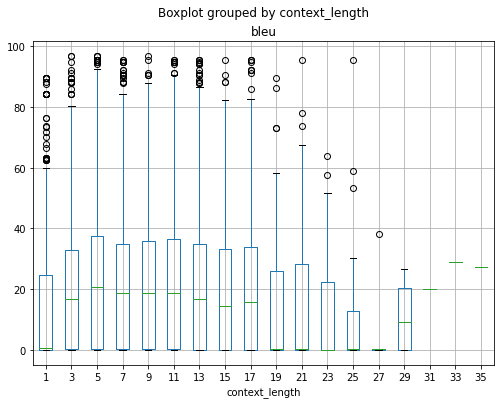

In [12]:
df.boxplot(column='bleu', by='context_length', figsize=(8,6))

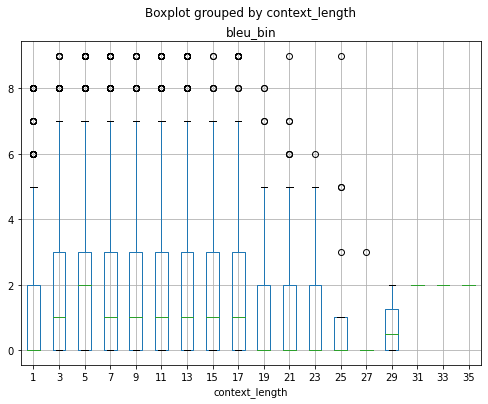

In [13]:
df.boxplot(column='bleu_bin', by='context_length', figsize=(8,6))

## [DEFINE] num_entities

In [14]:
regex_entity = r'\[([a-z\_\-]+)\]'

In [15]:
df['gold_entities'] = df.apply(lambda r: re.findall(regex_entity, r['gold']), 1)
df['num_entities'] = df.apply(lambda r: len(r['gold_entities']), 1)

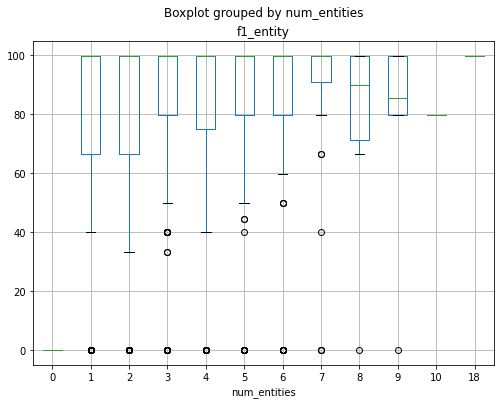

In [16]:
df.boxplot(column='f1_entity', by='num_entities', figsize=(8,6))

## [EXP] Scatter all pairs

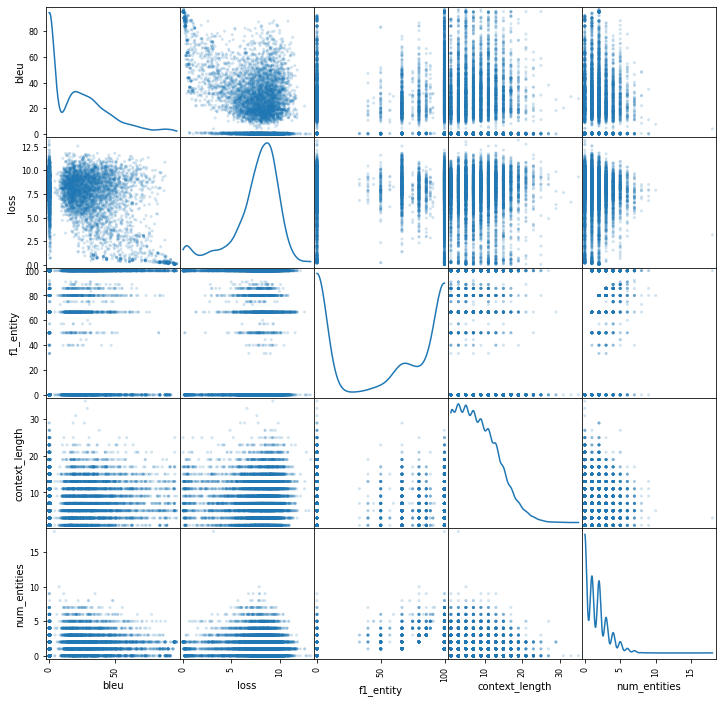

In [17]:
_ = scatter_matrix(df[['bleu', 'loss', 'f1_entity', 'context_length', 'num_entities']], alpha=0.2, diagonal='kde', figsize=(12,12))

## [EXP] Entitywise Avg. f1-entity

In [18]:
entity_log = {
    'entity':[],
    'loss':[],
    'bleu':[],
    'f1_entity':[],
    'context_length':[]
}
for _, row in df.iterrows():
    for e in row['gold_entities']:
        entity_log['entity'].append(e)
        entity_log['loss'].append(row['loss'])
        entity_log['bleu'].append(row['bleu'])
        entity_log['f1_entity'].append(row['f1_entity'])
        entity_log['context_length'].append(row['context_length'])

In [19]:
df_entity_log = pd.DataFrame.from_dict(entity_log)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38]),
 <a list of 38 Text major ticklabel objects>)

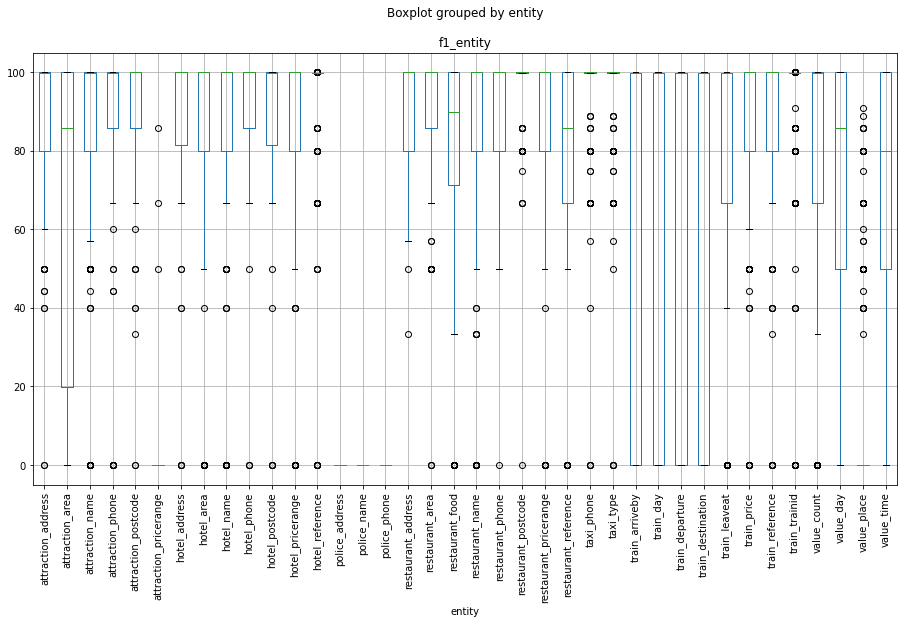

In [20]:
df_entity_log.boxplot(column='f1_entity', by='entity', figsize=(15,8))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38]),
 <a list of 38 Text major ticklabel objects>)

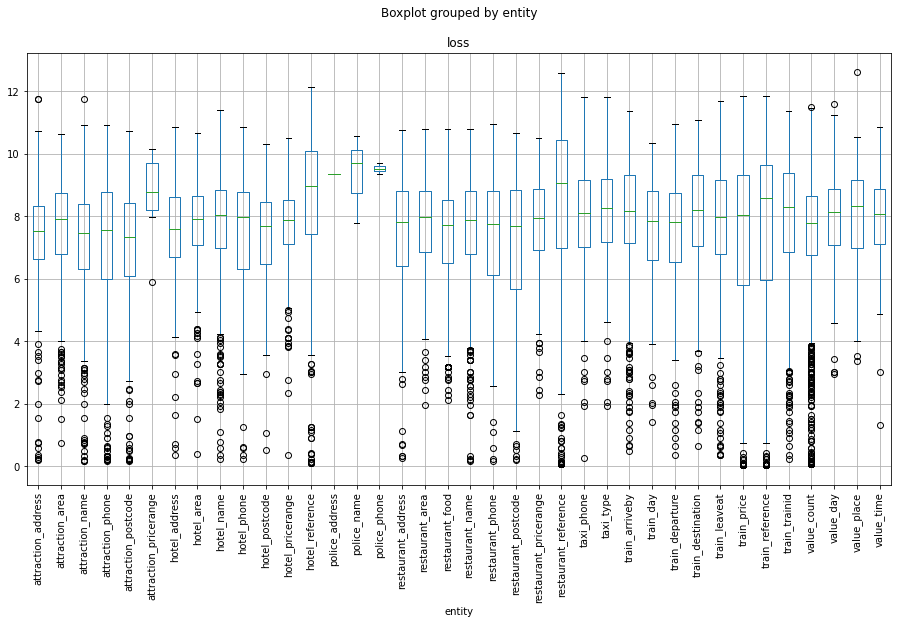

In [21]:
df_entity_log.boxplot(column='loss', by='entity', figsize=(15,8))
plt.xticks(rotation=90)

## [DEFINE] pred_entities

In [22]:
df['pred_entities'] = df.apply(lambda r: re.findall(regex_entity, r['generated']), 1)
df['num_pred_entities'] = df.apply(lambda r: len(r['pred_entities']), 1)

In [23]:
df.sample(4)

,file,context,gold,generated,loss,bleu,f1_entity,context_length,bleu_bin,gold_entities,num_entities,pred_entities,num_pred_entities
567,PMUL0815,"SOS i need a place to dine , and i would like ...",SOS you must try [restaurant_name] in the [res...,SOS i would recommend [restaurant_name] . it i...,8.645784,0.374000,99.900050,1,0.0,"[restaurant_name, restaurant_area]",2,"[restaurant_name, restaurant_area]",2
5896,MUL2569,"SOS yes , i am looking for theatres to go to i...",SOS what time would you like to leave [attract...,SOS what time would you like to leave ? EOS,2.004944,74.194476,0.000000,13,7.0,[attraction_name],1,[],0
4089,PMUL4224,SOS i am looking for information in [value_pla...,SOS it is free ! the best kind of fee ! EOS,SOS the entrance fee is free . EOS,9.696844,0.012174,0.000000,9,0.0,[],0,[],0
3213,MUL2317,SOS i am looking to check out local colleges c...,SOS would you like a restaurant in the [restau...,SOS i have [value_count] [restaurant_pricerang...,8.787018,16.662068,49.937528,7,1.0,"[restaurant_pricerange, restaurant_pricerange]",2,"[value_count, restaurant_pricerange, restauran...",3


# Extracting Samples

## [SAMPLES] By Loss

In [24]:
def print_row(r):
    print(f"\n[CONTEXT]")
    
    print("{}".format('\n'.join(r['context'].split('<br>')[-5:])))
    
    print(f"\n[GOLD]: {r['gold']}")
    
    print(f"\n[GEN]: {r['generated']}")

In [25]:
for _, row in df.nlargest(2, ['loss']).iterrows():
    print_row(row)


[CONTEXT]
SOS that is all i need , thanks . EOS
SOS glad i can help enjoy your stay . EOS
SOS parting is such sweet sorrow , but that i all i need , have a good day . EOS
SOS ta ta or now . see ya later alligator . EOS
SOS thanks for your help today . EOS

[GOLD]: SOS helping ha been m pleasure EOS

[GEN]: SOS thank you for using our service . have a great day . EOS

[CONTEXT]
SOS i am looking for a place to dine in the [restaurant_area] that serves [restaurant_food] food . EOS
SOS [restaurant_name] serves [restaurant_food] is in the [restaurant_area] . the price range is [restaurant_pricerange] . EOS
SOS great . please reserve a table for [value_count] people dining on [value_day] at [value_time] and send me the reference number . EOS
SOS your booking was successful . your reference number is [restaurant_reference] . please be advised that your table will be reserved for [value_count] minutes . EOS
SOS thank you very much ! EOS

[GOLD]: SOS take care and enjoy ! EOS

[GEN]: SOS is th

In [26]:
for _, row in df.nsmallest(2, ['loss']).iterrows():
    print_row(row)


[CONTEXT]
SOS yes for [value_count] please . EOS
SOS i will work on this and be right back with you . EOS
SOS ok . were you able to book it ? EOS
SOS how many tickets do you want ? EOS
SOS for [value_count] please . EOS

[GOLD]: SOS booking was successful , the total fee is [train_price] gbp payable at the station . reference number is [train_reference] . EOS

[GEN]: SOS booking was successful , the total fee is [train_price] gbp payable at the station . reference number is [train_reference] . EOS

[CONTEXT]
SOS yes i am also looking for a train that arrives in [train_destination] at [train_arriveby] . EOS
SOS what is your departure point and what day do you want to travel ? EOS
SOS i will be departing [train_departure] on [train_day] . EOS
SOS okay great ! [train_trainid] will be perfect , do you need a booking ? EOS
SOS yes . please get me tickets for the same group of people . EOS

[GOLD]: SOS booking was successful , the total fee is [train_price] gbp payable at the station . refe

In [27]:
for _, row in df.nsmallest(4, ['f1_entity']).iterrows():
    print_row(row)


[CONTEXT]
SOS hello , i am trying to find a train that leaves from [train_departure] and arrives here by [train_arriveby] today . can you help me book a ticket ? EOS

[GOLD]: SOS the closest arrival time i can give you is [train_arriveby] , is that ok ? and how many tickets would you like ? EOS

[GEN]: SOS yes , i have [value_count] trains that will arrive by [train_arriveby] . what day would you like to arrive ? EOS

[CONTEXT]
SOS hi , could you help me with some information on a particular attraction ? EOS

[GOLD]: SOS absolutely ! what attraction were you thinking of ? EOS

[GEN]: SOS what about [attraction_name] ? EOS

[CONTEXT]
SOS i need help finding a train . can you help ? EOS

[GOLD]: SOS yes i can help you find a train what station are you going to and from and at what time would you like to leave ? EOS

[GEN]: SOS where will you be departing from and what time ? EOS

[CONTEXT]
SOS are there any [restaurant_food] restaurant -s in the [restaurant_area] ? EOS

[GOLD]: SOS oh y

In [28]:
for _, row in df.nlargest(50, ['context_length']).sample(10).iterrows():
    print_row(row)


[CONTEXT]
SOS what options do i have ? EOS
SOS the first leaves at [value_time] and the latest leaves at [value_time] EOS
SOS i need at a train that leaves after [train_leaveat] EOS
SOS ok i have [value_count] leaving at [train_leaveat] . shall i book it ? EOS
SOS yes , can you please book that thank you . EOS

[GOLD]: SOS how many tickets will you need for the train ? EOS

[GEN]: SOS how many tickets do you need ? EOS

[CONTEXT]
SOS i am going to [train_destination] . EOS
SOS [train_trainid] arrives at [train_arriveby] . would you like to reserve seats ? EOS
SOS that sounds good . can you give me the price as well ? thanks . EOS
SOS sure . the price is [train_price] pounds per ticket . EOS
SOS great ! that is all i am going to need today . thanks for your help ! EOS

[GOLD]: SOS thank you for contacting [value_place] towninfo [attraction_area] . goodbye ! EOS

[GEN]: SOS thank you for using our service . have a great day . EOS

[CONTEXT]
SOS is there another guesthouse with a [value_

In [29]:
for _, row in df.nsmallest(50, ['context_length']).sample(10).iterrows():
    print_row(row)


[CONTEXT]
SOS hello , i am looking for place -s to go in the [attraction_area] . EOS

[GOLD]: SOS there are many attractions in the [attraction_area] like museums , architecture , boating , and concerthalls . what are you interested in ? EOS

[GEN]: SOS what type of attraction are you looking for ? EOS

[CONTEXT]
SOS i was wondering if you could help me find a hotel in the [hotel_area] part of town . EOS

[GOLD]: SOS i sure can . we have [value_count] accommodation options in the [hotel_area] part of town . [value_count] is a hotel , and [value_count] are guesthouses . do you have a preference ? EOS

[GEN]: SOS there are [value_count] guesthouses in the [hotel_area] . do you have a preference for area ? EOS

[CONTEXT]
SOS i am looking for information about the [attraction_name] in [value_place] . EOS

[GOLD]: SOS the [attraction_name] is a museum in the center of town . EOS

[GEN]: SOS [attraction_name] is in the [attraction_area] . EOS

[CONTEXT]
SOS i need a train to [train_destinat

## Compare Target and Predicted Entities

In [30]:
ent_pred_ledger = defaultdict(list)
for _, row in df.iterrows():
    gold = set(row['gold_entities'])
    gen = set(row['pred_entities'])
    for e in gold - gen:
        # These didn't get predicted, lost count
        ent_pred_ledger[e].append(-1)
        
    for e in gen - gold:
        # These weren't supposed to get predicted, excess count
        ent_pred_ledger[e].append(+1)
        
    for e in gen.intersection(gold):
        # These are ok
        ent_pred_ledger[e].append(0)

In [31]:
df_ent_pred_ledger = {}
for e in ent_pred_ledger:
    preds = np.array(ent_pred_ledger[e])
#     print(f"\n{e.upper()}")
    fp = (preds == 1).sum()
    fn = (preds == -1).sum()
    tp = (preds == 0).sum()
#     print(f" TP: {tp}, {100*tp/(fp+fn+tp):0.2F}")
#     print(f" FP: {fp}, {100*fp/(fp+fn+tp):0.2F}")
#     print(f" FN: {fn}, {100*fn/(fp+fn+tp):0.2F}")
    df_ent_pred_ledger[e] = {
        'gold_appear': fn + tp,
        'tpr': 100*tp/(fp+fn+tp),
        'fpr': 100*fp/(fp+fn+tp),
        'fnr': 100*fn/(fp+fn+tp),
        'tp': tp,
        'fp': fp,
        'fn': fn,
    }
df_ent_pred_ledger = pd.DataFrame.from_dict(df_ent_pred_ledger, orient='index')
df_ent_pred_ledger = df_ent_pred_ledger.sort_values('gold_appear', ascending=False)

In [32]:
df_ent_pred_ledger.sort_values('tpr', ascending=False)

,gold_appear,tpr,fpr,fnr,tp,fp,fn
train_reference,292,93.355482,2.990033,3.654485,281,9,11
taxi_phone,201,92.924528,5.188679,1.886792,197,11,4
hotel_reference,235,92.741935,5.241935,2.016129,230,13,5
restaurant_reference,280,92.068966,3.448276,4.482759,267,10,13
attraction_phone,219,92.035398,3.097345,4.867257,208,7,11
restaurant_phone,99,91.919192,0.000000,8.080808,91,0,8
taxi_type,199,91.509434,6.132075,2.358491,194,13,5
hotel_phone,92,90.625000,4.166667,5.208333,87,4,5
attraction_postcode,204,89.041096,6.849315,4.109589,195,15,9
restaurant_postcode,99,88.461538,4.807692,6.730769,92,5,7


## Macro-Avg Entity Prediction Success at different context lengths

In [33]:
def proc_row(row):
    gold = set(row['gold_entities'])
    gen = set(row['pred_entities'])
    
    L = len(gold)
    entity_recall = len(gen.intersection(gold))/L if L > 0 else 0
    entity_prec = len(gen.intersection(gold))/len(gen) if len(gen) > 0 else 0
    entity_f1 = 2*entity_prec*entity_recall/(entity_recall+entity_prec) if (entity_recall+entity_prec) >0 else 0
        
    return entity_prec, entity_recall, entity_f1

In [34]:
df['entity_prec'] = df.apply(lambda r: proc_row(r)[0], 1)
df['entity_recall'] = df.apply(lambda r: proc_row(r)[1], 1)
df['entity_f1'] = df.apply(lambda r: proc_row(r)[2], 1)

In [35]:
df[(df['num_entities'] > 0)].describe()

,loss,bleu,f1_entity,context_length,bleu_bin,num_entities,num_pred_entities,entity_prec,entity_recall,entity_f1
count,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000
mean,7.507684,23.831955,78.709516,7.520025,2.039635,2.303382,2.225565,0.801622,0.838218,0.801937
std,2.286177,22.583988,33.636858,4.901792,2.125154,1.409984,1.571713,0.323954,0.314656,0.304128
min,0.037561,0.000047,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.644042,0.482091,66.577830,3.000000,0.000000,1.000000,1.000000,0.666667,0.800000,0.666667
50%,7.955744,20.904316,99.850125,7.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,9.005568,36.701566,99.900050,11.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000
max,12.599606,96.821333,99.935741,29.000000,9.000000,18.000000,22.000000,1.000000,1.000000,1.000000


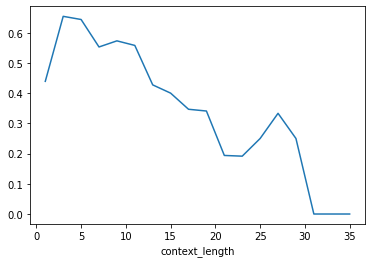

In [36]:
df.groupby('context_length')['entity_prec'].mean().plot()

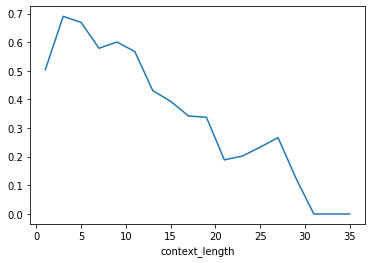

In [37]:
df.groupby('context_length')['entity_recall'].mean().plot()

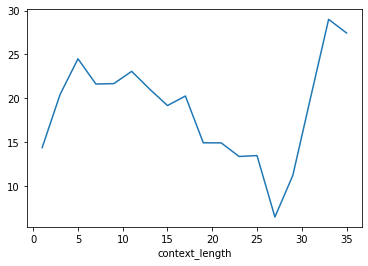

In [38]:
df.groupby('context_length')['bleu'].mean().plot()

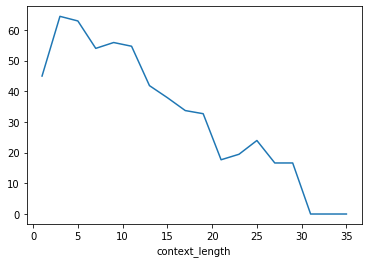

In [39]:
df.groupby('context_length')['f1_entity'].mean().plot()

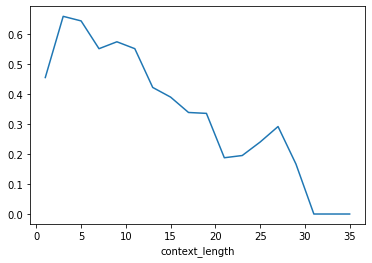

In [40]:
df.groupby('context_length')['entity_f1'].mean().plot()

## [RESULT] Correctness of entities predicted

Our model is more accurate in the entities being mentioned also uses appropriate number of entities in the generated response. Our model uses almost the same or sometimes less numbers of entities in its responses compared to Marco as is more accurate on avg.

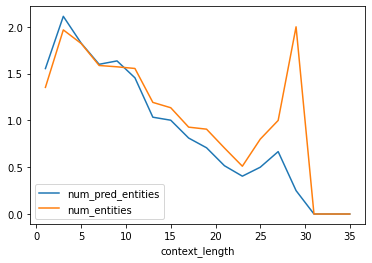

In [41]:
df.groupby('context_length')[['num_pred_entities', 'num_entities']].mean().plot()

### [DEFINE] Avg. Response Length

In [42]:
response_lengths = df.apply(lambda x: len(x["generated"].split()), 1)
response_lengths.mean()

17.494302767227346

# Process Dialog level Stats (Inform/Success)

In [43]:
df_temp = df.groupby('file')[['context_length']].max().reset_index()
df_temp['file'] = df_temp.apply(lambda r: r['file']+'.json', 1)
df_combo = pd.merge(df_temp, df_stats, how='inner', on='file')

In [44]:
df_combo.head()

,file,match,success
0,MUL0003.json,0,0
1,MUL0004.json,1,1
2,MUL0011.json,1,1
3,MUL0014.json,1,1
4,MUL0018.json,1,1


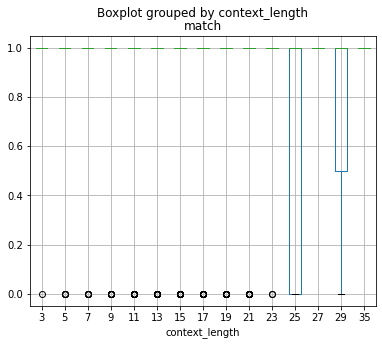

In [51]:
df_combo.boxplot('match', 'context_length', figsize=(6,5))

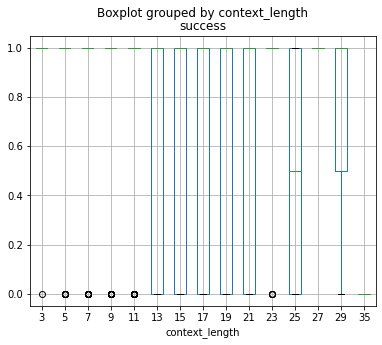

In [52]:
df_combo.boxplot('success', 'context_length', figsize=(6,5))

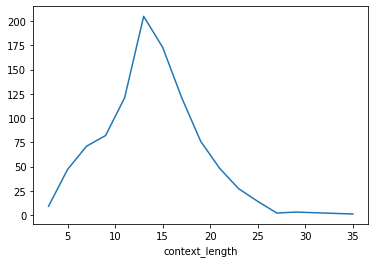

In [63]:
df_combo.groupby('context_length')['context_length'].count().plot()

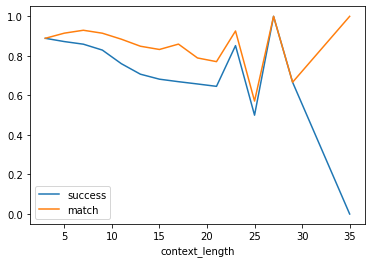

In [62]:
df_combo.groupby('context_length')[['success', 'match']].mean().plot()

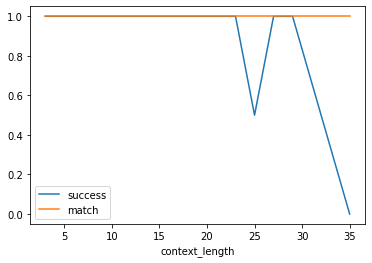

In [58]:
df_combo.groupby('context_length')[['success', 'match']].median().plot()